# Experimenting with Gradients

In this notebook I wish to show some of my experiments with the Sobel function.

## Different orders of derivatives

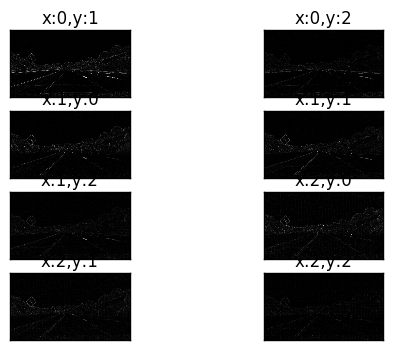

8 different Sobel combinations saved into the disk


In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

try:
    f = open('test2.jpg')
    f.close()
except:
    raise Exception('Make sure the test images are in the same folder as the notebook')
    
img_color = mpimg.imread('test2.jpg')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2HLS_FULL)[:,:,1]

counter = 0
for x in range(0, 3):
    for y in range(0, 3):
        if 0 == x and 0 == y:
            continue
        
        counter += 1
        img_sobel = np.absolute(cv2.Sobel(img_gray, cv2.CV_64F, x, y))
        plt.subplot(4, 2, counter)
        plt.title("x:{},y:{}".format(x, y))
        plt.xticks([])
        plt.yticks([])
        plt.imshow((255*img_sobel/np.max(img_sobel)).astype(np.uint8), cmap="gray")
        
        mpimg.imsave("test-Sobelx{}y{}.jpg".format(x, y), img_sobel, cmap="gray")
        
plt.show()
print ("8 different Sobel combinations saved into the disk")

## Observations 1

My first observation is that the first order derivatives of x and y when not combined are crisp and signify border lines in the image quite well:
<img src="test-Sobelx0y1.jpg">
Y derivative
<img src="test-Sobelx1y0.jpg">
X derivative

## Observation 2

My second observation is that the combined derivative is a blurred combination of the two pure derivatives above.
<img src="test-Sobelx1y1.jpg">

## Observation 3

My last observation is that the upper derivatives have a tendency towards capturing some of the digital encoding artifacts (aka the JPEG compression scheme) rather than capturing meaningful visual information in the image.
<img src="test-Sobelx2y0.jpg">
<img src="test-Sobelx2y2.jpg">

## Obtain direction of the gradient

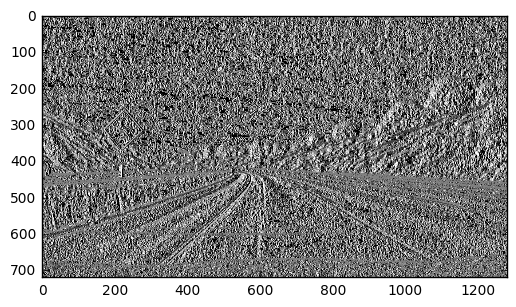

In [6]:
try:
    f = open('test2.jpg')
    f.close()
except:
    raise Exception('Make sure the test images are in the same folder as the notebook')
    
img_color = mpimg.imread('test2.jpg')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2HLS_FULL)[:,:,1]

gradient_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0)
gradient_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1)
direction = np.arctan2(gradient_y, gradient_x)

img_direction = (255*np.absolute(direction)/180).astype(np.uint8)
plt.imshow(img_direction, cmap="gray")
plt.show()


## Applying binary thresholds on the X derivative

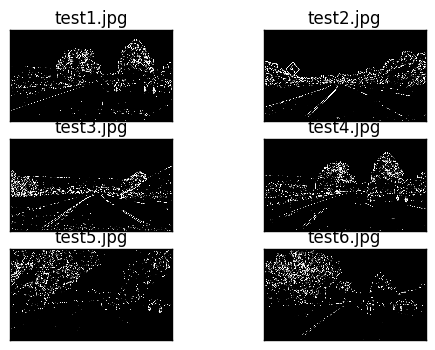

A total of 6 files were saved into disk for study.


In [17]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
import re
%matplotlib inline

# 'percentage_binary_thresholding.ipynb'
def percentages_to_thresholds(img_gray, lower_percentage, upper_percentage):
    norm_hist = (np.cumsum(np.histogram(img_gray, 255, (0.0, 255.0))[0]) / \
                 img_gray.size).astype(np.float32)
    values = np.arange(0, 255)[((norm_hist >= lower_percentage) & \
                                (norm_hist <= upper_percentage))]
    
    return np.min(values), np.max(values)

# 'gradient_experiment.ipynb'
def get_binary_gradient(img, low_thresh=0.95, high_thresh=1.0):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2HLS_FULL)[:,:,1]
    
    gradient_x = np.absolute(cv2.Sobel(img_gray, cv2.CV_64F, 1, 0))
    gradient_x = 255 * gradient_x / np.max(gradient_x)
    
    binary = np.zeros_like(img_gray).astype(np.uint8)
    low_thresh, high_thresh = percentages_to_thresholds(gradient_x, \
        low_thresh, high_thresh)
    
    binary[(gradient_x >= low_thresh) & (gradient_x <= high_thresh)] = 255
    return binary
    
    
filenames = glob.glob('test?.jpg')
if len(filenames) != 6:
    raise Exception('Make sure the test images are in the same folder as the notebook')

for sequence, filename in enumerate(filenames):
    img = mpimg.imread(filename)
    binary = get_binary_gradient(img)

    plt.subplot(3, 2, sequence + 1)
    plt.imshow(binary, cmap="gray")
    plt.title(filename)
    plt.xticks([])
    plt.yticks([])
    
    bare_filename = re.search(r'([^.\\/]+)\.jpe?g$', filename).group(1)
    mpimg.imsave("{}-SobelXBinary.jpg".format(bare_filename), binary, cmap="gray")

plt.show()
print("A total of {} files were saved into disk for study.".format(len(filenames)))


## Combining the gradient binary image with the color binary image

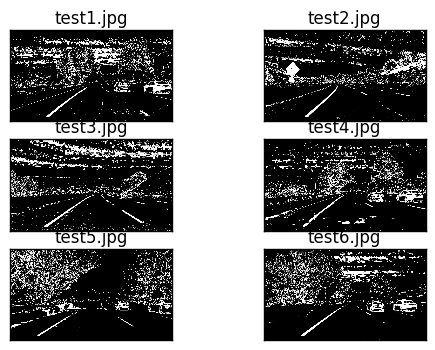

A total of 6 files were saved into disk for study.
